In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
plt.rcParams["axes.grid"] = True

# Import data

In [102]:
df = pd.read_csv("wars.txt", delimiter="\t")
deaths_data = df["deaths"]
df.sample(6)

,name,deaths
55,Third Buenos Aires War of 1861-1862 ...,1000
302,Bloody Sunday War of 1905-1906 ...,5300
68,Milan Five Day Revolt of 1848 ...,1030
416,Paris Commune War of 1871 ...,21379
85,Bluefields Insurrection of 1909-1910 ...,1192
284,Kronstadt Rebellion of 1921 ...,4600


In [76]:
min_deaths, max_deaths = deaths_data.min(), deaths_data.max()

16634907


# Different scales with equal bins

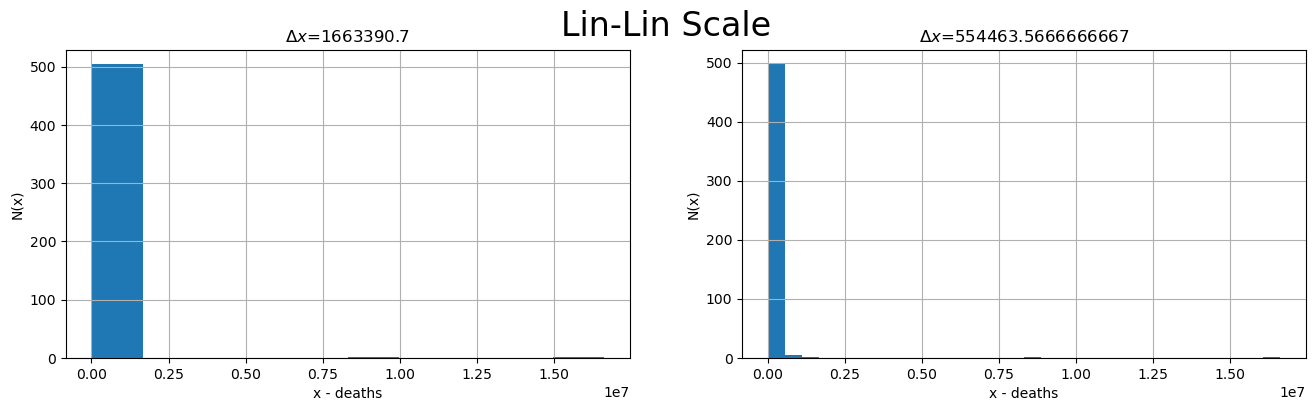

In [134]:
num_bins1, num_bins2 = 10, 30

fig, ax = plt.subplots(ncols=2, figsize=(16, 4))
counts1, _, _ = ax[0].hist(deaths_data, histtype="stepfilled", density=False, bins=num_bins1)
ax[1].hist(deaths_data, histtype="stepfilled", density=False, bins=num_bins2)
ax[0].set_title(fr"$\Delta x$={(max_deaths-min_deaths)/num_bins1}")
ax[1].set_title(fr"$\Delta x$={(max_deaths-min_deaths)/num_bins2}")
fig.suptitle("Lin-Lin Scale", fontsize=24)

for axx in ax.flatten():
    axx.set_ylabel("N(x)")
    axx.set_xlabel("x - deaths")

with open('WC1.txt', 'w') as file:
    file.writelines(['bins=2\n'])
    file.writelines([str(val)+'\n' for val in counts1])


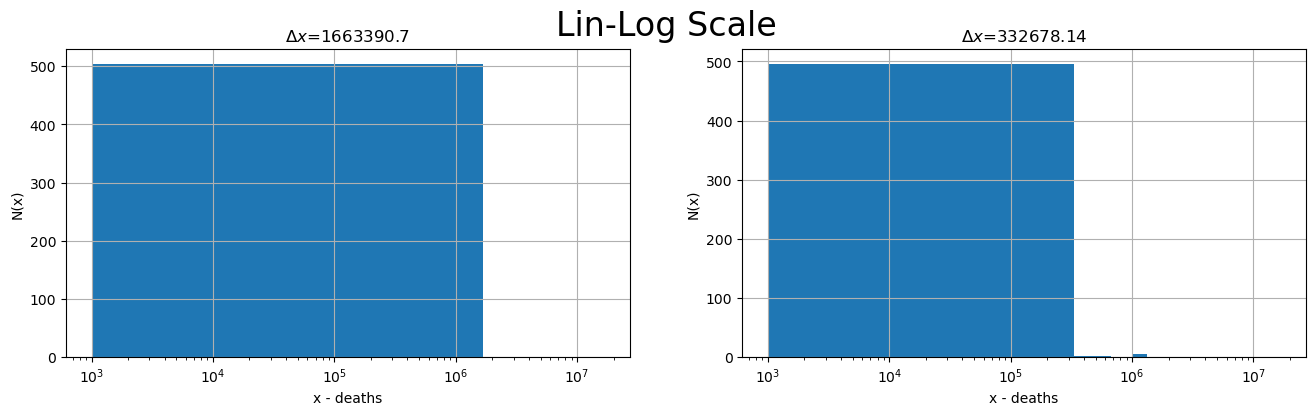

In [51]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4))
ax[0].hist(deaths_data, histtype="stepfilled", density=False, bins=num_bins1)
ax[1].hist(deaths_data, histtype="stepfilled", density=False, bins=num_bins2)
ax[0].set_title(fr"$\Delta x$={(max_deaths-min_deaths)/num_bins1}")
ax[1].set_title(fr"$\Delta x$={(max_deaths-min_deaths)/num_bins2}")
ax[0].set_xscale("log")
ax[1].set_xscale("log")
fig.suptitle("Lin-Log Scale", fontsize=24)

for axx in ax.flatten():
    axx.set_ylabel("N(x)")
    axx.set_xlabel("x - deaths")

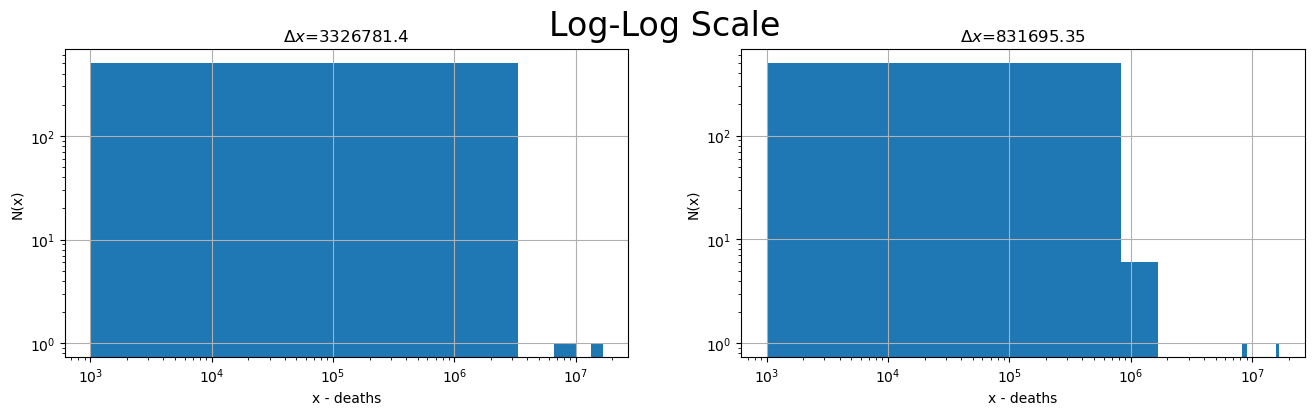

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4))
ax[0].hist(deaths_data, histtype="stepfilled", density=False, bins=num_bins1)
ax[1].hist(deaths_data, histtype="stepfilled", density=False, bins=num_bins2)
ax[0].set_title(fr"$\Delta x$={(max_deaths-min_deaths)/num_bins1}")
ax[1].set_title(fr"$\Delta x$={(max_deaths-min_deaths)/num_bins2}")
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_xscale("log")
ax[1].set_xscale("log")
fig.suptitle("Log-Log Scale", fontsize=24)

for axx in ax.flatten():
    axx.set_ylabel("N(x)")
    axx.set_xlabel("x - deaths")

# Probability density $P(x)$

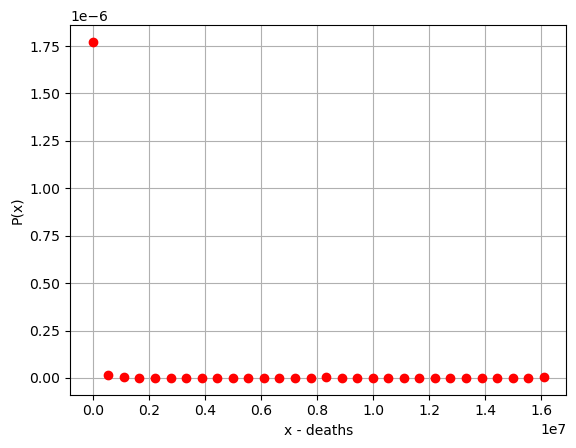

In [135]:
num_bins = 30
hist, edges = np.histogram(deaths_data, bins=num_bins, density=True)
plt.plot(edges[:-1], hist, 'or')
plt.xlabel('x - deaths')
plt.ylabel('P(x)')

with open('WC2.txt', 'w') as file:
    file.writelines(['bins=30\n'])
    file.writelines([str(val)+'\n' for val in hist])

# Exponential bin width

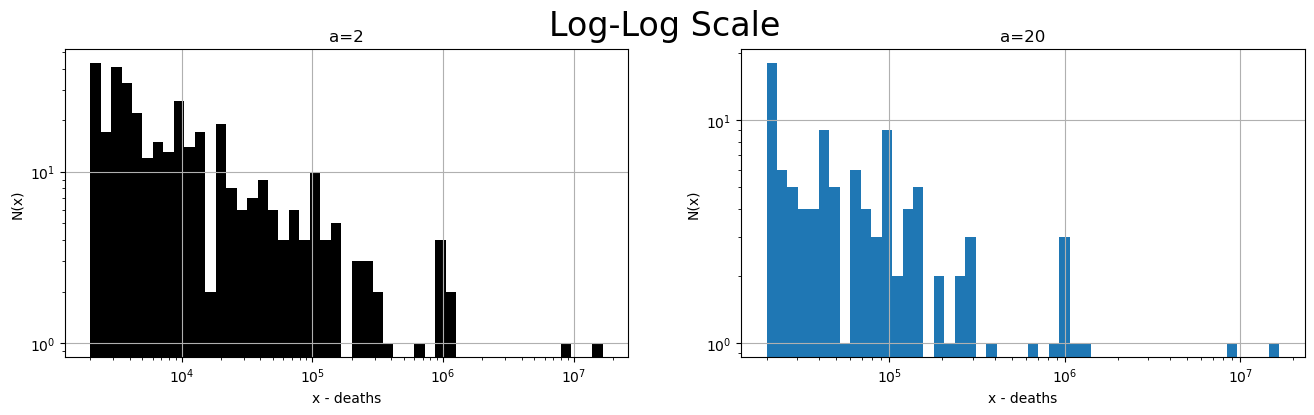

In [113]:
base_a1, base_a2 = 2, 20
bins1 = min_deaths * np.logspace(1, math.log(max_deaths / min_deaths, base_a1), base=base_a1)
bins2 = min_deaths * np.logspace(1, math.log(max_deaths / min_deaths, base_a2), base=base_a2)

fig, ax = plt.subplots(ncols=2, figsize=(16, 4))
ax[0].hist(deaths_data, density=False, bins=bins1, color='black')
ax[1].hist(deaths_data, density=False, bins=bins2, color='black')
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_title(f'a={base_a1}')
ax[1].set_title(f'a={base_a2}')
fig.suptitle("Log-Log Scale", fontsize=24)

for axx in ax.flatten():
    axx.set_ylabel("N(x)")
    axx.set_xlabel("x - deaths")

# Probability density $P(x)$

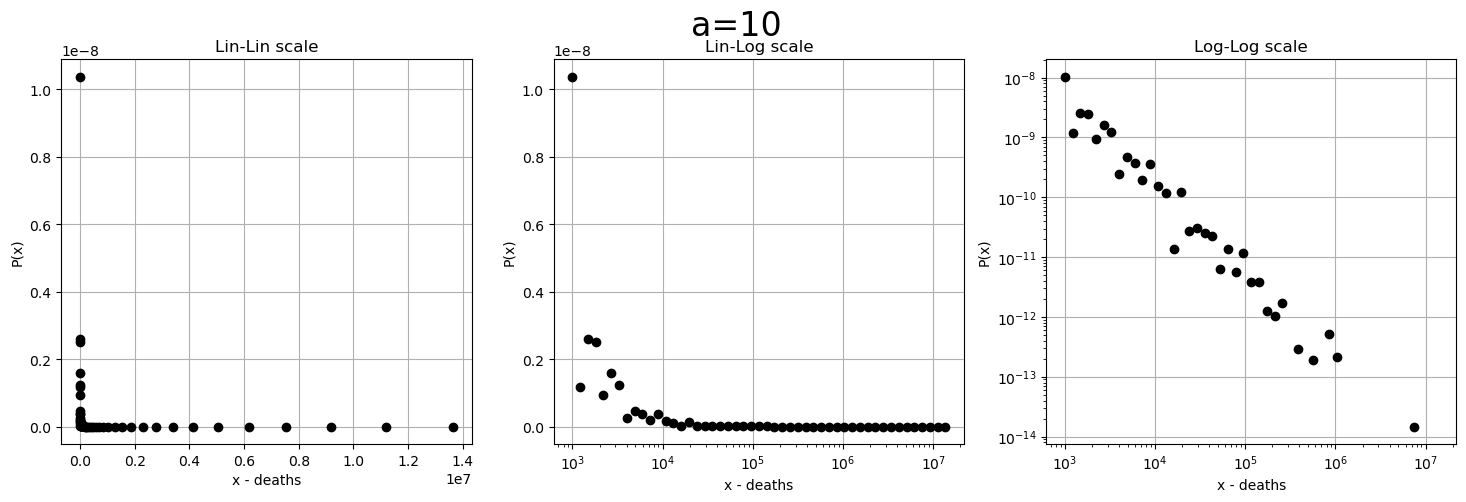

In [136]:
base_a = 10
bins = min_deaths * np.logspace(0, math.log(max_deaths/ min_deaths, base_a), base=base_a)

hist, edges = np.histogram(deaths_data, bins=bins, density=False)
dX = np.diff(edges)
P = hist / dX / np.sum(deaths_data)

fig, ax = plt.subplots(ncols=3, figsize=(18, 5))
ax[0].set_title("Lin-Lin scale")
ax[1].set_xscale("log")
ax[1].set_title("Lin-Log scale")
ax[2].set_yscale("log")
ax[2].set_xscale("log")
ax[2].set_title("Log-Log scale")
fig.suptitle(f"a={base_a}", fontsize=24)

for axx in ax.flatten():
    axx.set_ylabel("P(x)")
    axx.set_xlabel("x - deaths")
    axx.plot(edges[:-1], P, 'ok')

with open('WC3.txt', 'w') as file:
    file.writelines([f'a={base_a}\n'])
    file.writelines([str(val)+'\n' for val in hist])

# Cumulative density $P_c(x)$

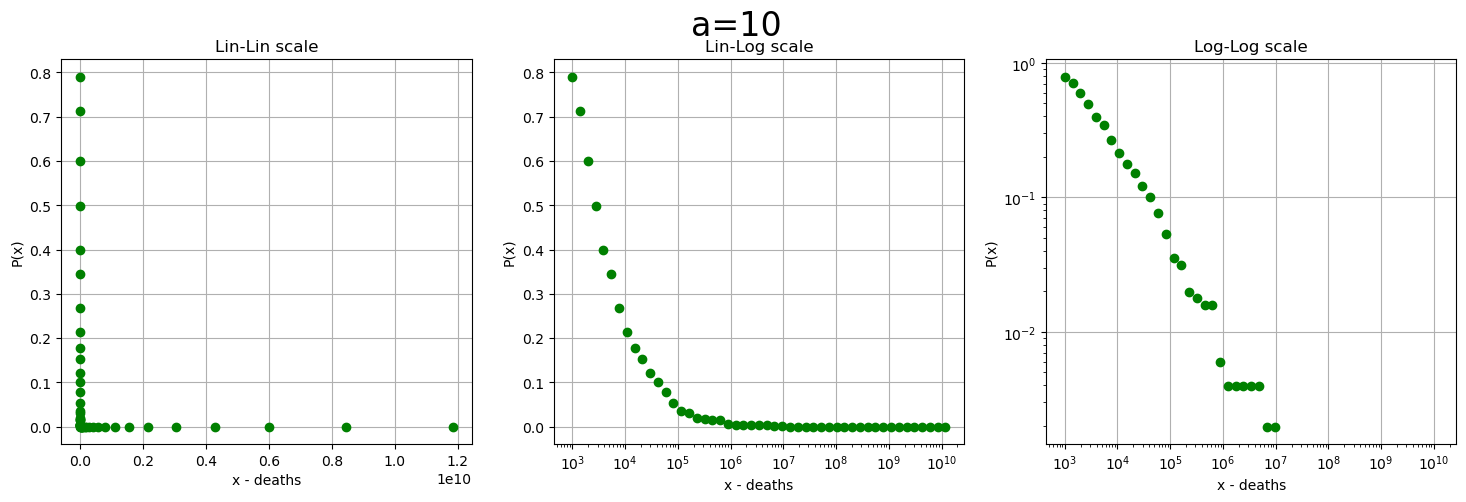

In [104]:
base_a = 10
bins = min_deaths * np.logspace(0, math.log(max_deaths, base_a), base=base_a)
hist, edges = np.histogram(deaths_data, bins=bins, density=True)
dX = np.diff(edges)
Pc = 1 - np.cumsum(hist*dX)

fig, ax = plt.subplots(ncols=3, figsize=(18, 5))
ax[0].set_title("Lin-Lin scale")
ax[1].set_xscale("log")
ax[1].set_title("Lin-Log scale")
ax[2].set_yscale("log")
ax[2].set_xscale("log")
ax[2].set_title("Log-Log scale")
fig.suptitle(f"a={base_a}", fontsize=24)

for axx in ax.flatten():
    axx.set_ylabel("P(x)")
    axx.set_xlabel("x - deaths")
    axx.plot(edges[:-1], Pc, 'og')